# Dynamics of a small solvated peptide chain (5-mer)
(Lammps example)

Created by Georgii Vandyshev (B02-004)

# 0. Import lib

In [82]:
from ase.io import read
from ase.visualize import view
import numpy as np
import nglview
import plotly.graph_objects as go
import pickle

## 1. Default system

In [79]:
data = read("input/data.peptide", format='lammps-data')
view(data, viewer="ngl")

# Visualization dump

In [80]:
T = 275 # notification in telegram

data = read(f"data/dump/dump.peptide_{T}", index=':')
view(data, viewer="ngl")

In [81]:
nglview.show_asetraj(data, gui=True)

NGLWidget(max_frame=500)

# MSD

In [83]:
msd = []
Temp = range(270, 320, 10)

for T in Temp:
    data = np.genfromtxt(f'/home/common/studtscm06/peptide/data/msd/temp_{T}.msd', skip_header=2)
    msd.append(data)
    
with open('/home/common/studtscm06/peptide/pickle/msd.pickle', "wb") as f:
    pickle.dump(msd, f)

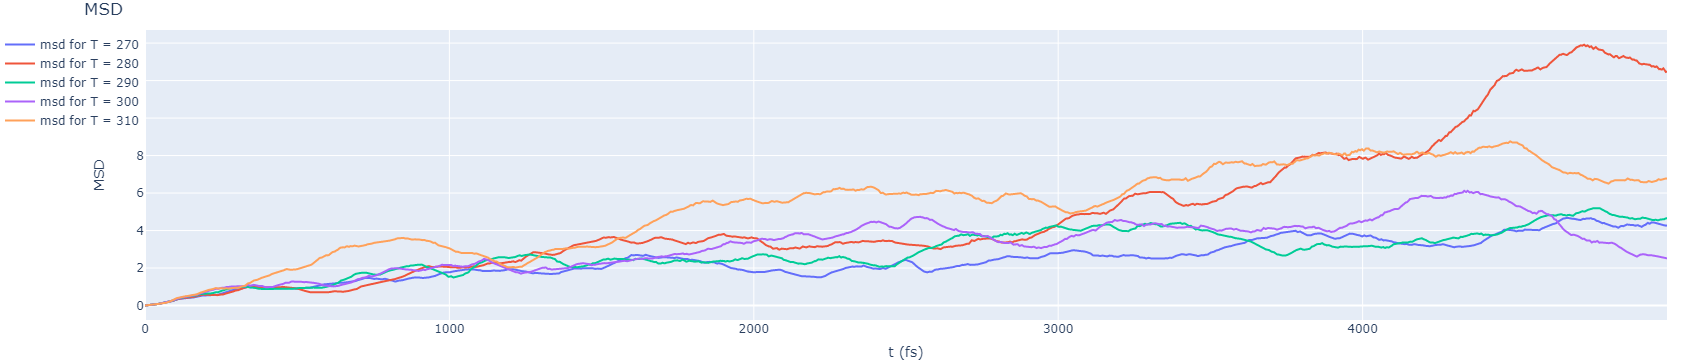

In [53]:
fig = go.Figure()
for i in range(len(Temp)):
    fig.add_trace(go.Scatter(x=msd[i][:, 0], y=msd[i][:, 1],  name=f'msd for T = {Temp[i]} К'))
fig.update_layout(legend_orientation="v",
                  legend=dict(x=0, xanchor="right"),
                  title="MSD",
                  yaxis_title="MSD",
                  xaxis_title="t (fs)",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

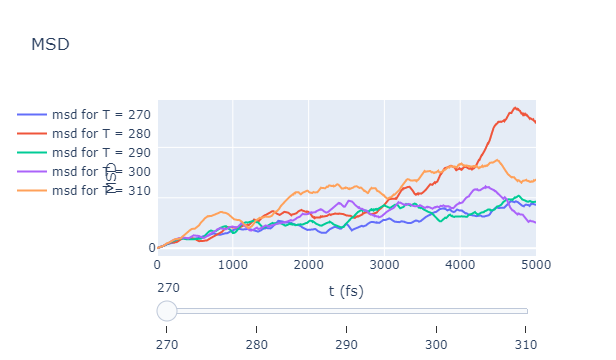

In [65]:
num_steps = len(Temp)
trace_list = []

for i in range(len(Temp)):
    trace_list.append(go.Scatter(x=msd[i][:, 0], y=msd[i][:, 1],  name=f'msd for T = {Temp[i]}'))

fig = go.Figure(data=trace_list)

steps = []
for i in range(num_steps):
    step = dict(
        label = Temp[i],
        method = 'restyle',  
        args = ['visible', [False] * len(fig.data)],
    )
    # Enable trace we want to see
    step['args'][1][i] = True
    
    # Add step to step list
    steps.append(step)

sliders = [dict(
    # urrentvalue = {"prefix": 'msd for T = ', "font": {"size": 20}},
    # len = 0.9,
    # x = 0.1,
    # pad = {"b": 10, "t": 50},
    steps = steps,
)]

fig.layout.sliders = sliders

fig.update_layout(legend_orientation="v",
                  legend=dict(x=0, xanchor="right"),
                  title="MSD",
                  yaxis_title="MSD",
                  xaxis_title="t (fs)")

fig.show()